# Course End Project : HealthCare

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data preprocessing and Visualisation


In [2]:
df = pd.read_csv("1645792390_cep1_dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()   # there is no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df[df.duplicated()]   # row number 164 is a duplicate row

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)    # removing the duplicate row
df.shape

(302, 14)

<Axes: >

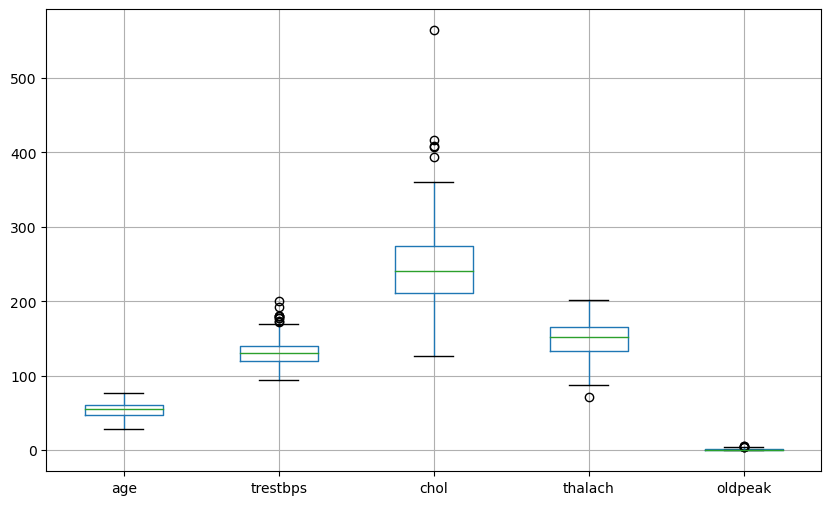

In [11]:
# checking for outliers
plt.figure(figsize=(10,6))
df.boxplot(column=['age','trestbps','chol','thalach','oldpeak']) 

In [12]:
# there are outliers in the numerical columns except "age"

In [13]:
# Finding values of outliers(IQR method)

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in ['age','trestbps','chol','thalach','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in trestbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in thalach attribute : [71]
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]


In [14]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['trestbps','chol','thalach','oldpeak']:
    df[i]=handle_outliers(df[i])

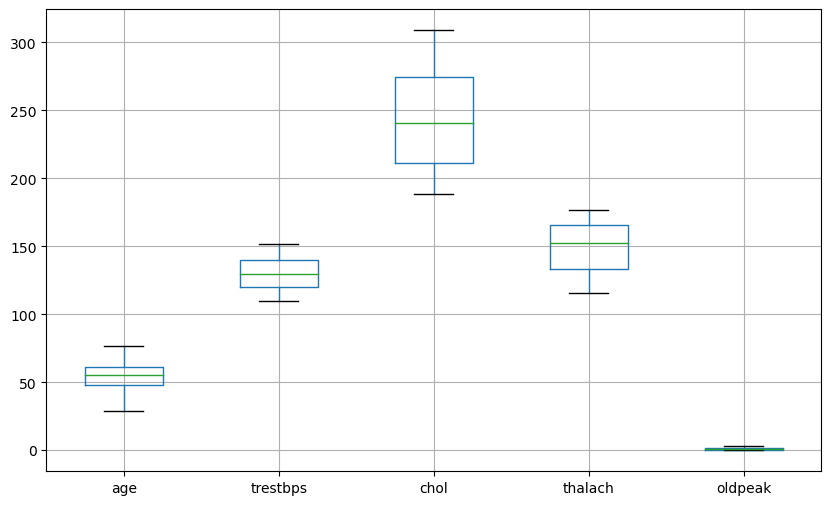

In [15]:
# verifying again with boxplot
plt.figure(figsize=(10,6))
df.boxplot(column=['age','trestbps','chol','thalach','oldpeak']);

In [16]:
# now there are no outliers

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,130.523179,13.620063,110.0,120.00,130.0,140.00,152.0
chol,302.0,244.696358,39.237586,188.4,211.00,240.5,274.75,308.9
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.992715,19.608496,116.0,133.25,152.5,166.00,176.8
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,0.966556,0.976726,0.0,0.00,0.8,1.60,2.8


In [18]:
mean_value = df.mean()
median_value = df.median()

std_deviation = df.std()
interquartile_range = df.quantile(0.75) - df.quantile(0.25)

print("Mean:\n", mean_value)


Mean:
 age          54.420530
sex           0.682119
cp            0.963576
trestbps    130.523179
chol        244.696358
fbs           0.149007
restecg       0.526490
thalach     149.992715
exang         0.327815
oldpeak       0.966556
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64


In [19]:
print("\nMedian:\n", median_value)



Median:
 age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64


In [20]:
print("\nStandard Deviation:\n", std_deviation)



Standard Deviation:
 age          9.047970
sex          0.466426
cp           1.032044
trestbps    13.620063
chol        39.237586
fbs          0.356686
restecg      0.526027
thalach     19.608496
exang        0.470196
oldpeak      0.976726
slope        0.616274
ca           1.006748
thal         0.613026
target       0.498970
dtype: float64


In [21]:
print("\nInterquartile Range:\n", interquartile_range)


Interquartile Range:
 age         13.00
sex          1.00
cp           2.00
trestbps    20.00
chol        63.75
fbs          0.00
restecg      1.00
thalach     32.75
exang        1.00
oldpeak      1.60
slope        1.00
ca           1.00
thal         1.00
target       1.00
dtype: float64


#  Exploring categorical features:

In [22]:
df["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

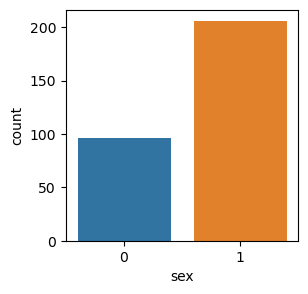

In [23]:
plt.figure(figsize=(3,3))
sns.countplot(x = "sex",data = df)  # countplot
plt.show()

In [24]:
df["cp"].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

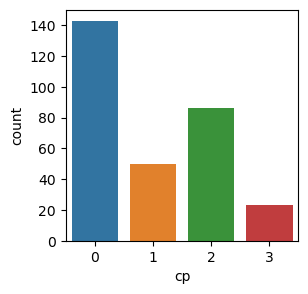

In [25]:
plt.figure(figsize=(3,3))
sns.countplot(x = "cp",data = df)
plt.show()

In [26]:
df["fbs"].value_counts()


0    257
1     45
Name: fbs, dtype: int64

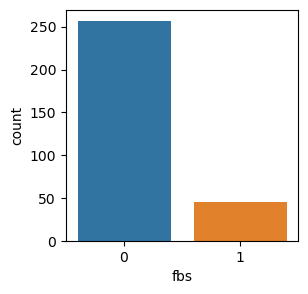

In [27]:
plt.figure(figsize=(3,3))
sns.countplot(x = "fbs",data = df)
plt.show()

In [28]:
df["restecg"].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

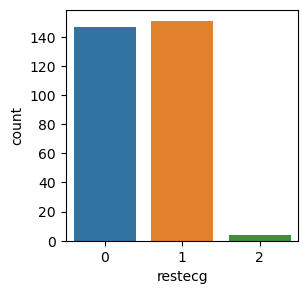

In [29]:
plt.figure(figsize=(3,3))
sns.countplot(x = "restecg",data = df)
plt.show()

In [30]:
df["exang"].value_counts()

0    203
1     99
Name: exang, dtype: int64

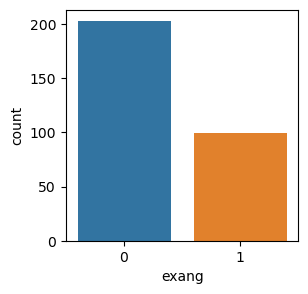

In [31]:
plt.figure(figsize=(3,3))
sns.countplot(x = "exang",data = df)
plt.show()

In [32]:
df["slope"].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

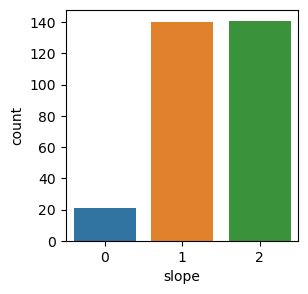

In [33]:
plt.figure(figsize=(3,3))
sns.countplot(x = "slope",data = df)
plt.show()

In [34]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

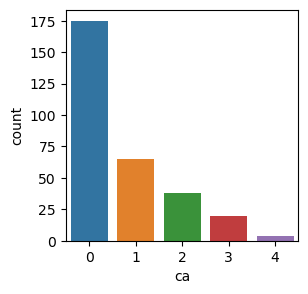

In [35]:
plt.figure(figsize=(3,3))
sns.countplot(x = "ca",data = df)
plt.show()

In [36]:
df["thal"].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

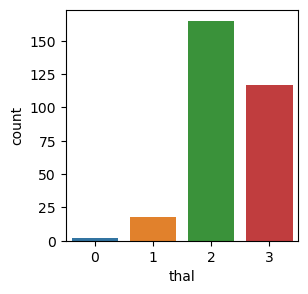

In [37]:
plt.figure(figsize=(3,3))
sns.countplot(x = "thal",data = df)
plt.show()

In [38]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

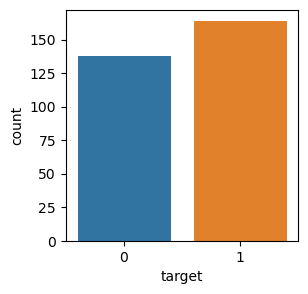

In [39]:
plt.figure(figsize=(3,3))
sns.countplot(x = "target",data = df)
plt.show()

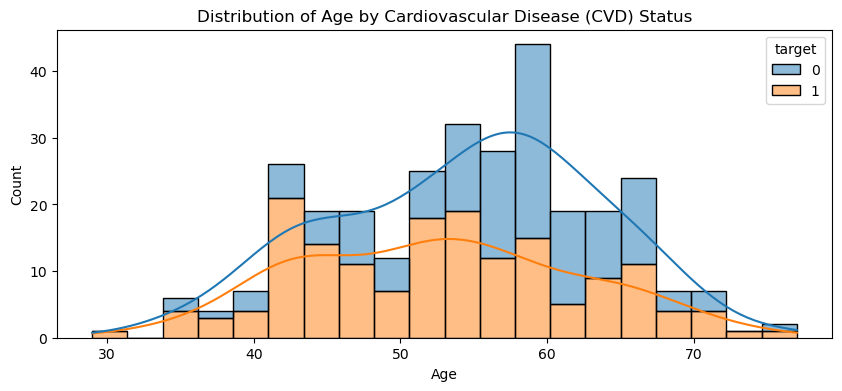

In [40]:
# Example: Histogram of Age, separated by CVD status
plt.figure(figsize=(10, 4))
sns.histplot(df, x='age', hue='target', bins=20, kde=True, multiple='stack')
plt.title('Distribution of Age by Cardiovascular Disease (CVD) Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

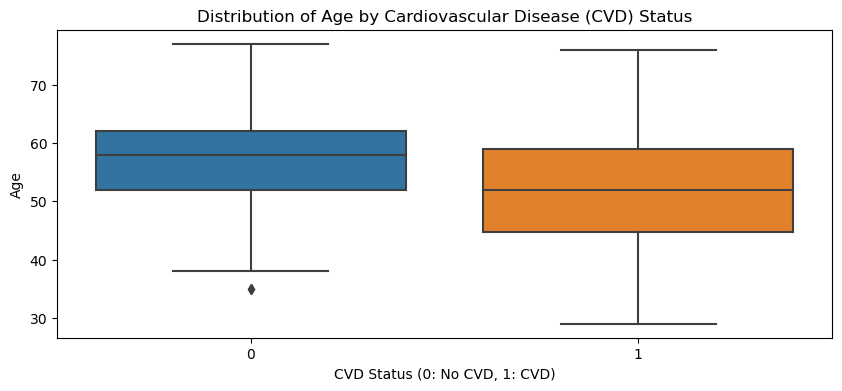

In [41]:
# Example: Boxplot of Age vs. Target (CVD)
plt.figure(figsize=(10, 4))
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribution of Age by Cardiovascular Disease (CVD) Status')
plt.xlabel('CVD Status (0: No CVD, 1: CVD)')
plt.ylabel('Age')
plt.show()

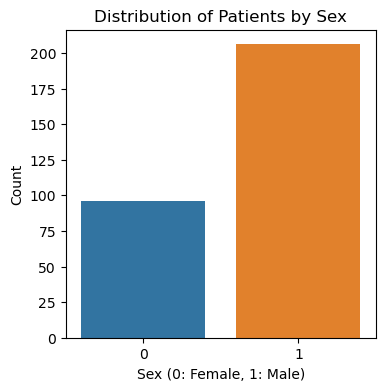

In [42]:
# Countplot of Sex
plt.figure(figsize=(4, 4))
sns.countplot(x='sex', data=df)
plt.title('Distribution of Patients by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

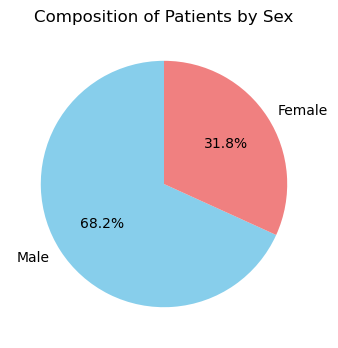

In [43]:
sex_distribution = df['sex'].value_counts()
labels = ['Male', 'Female']

plt.figure(figsize=(4, 4))
plt.pie(sex_distribution, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Composition of Patients by Sex')
plt.show()

In [44]:
df_new = df[["trestbps","target"]].groupby(["trestbps","target"]).size().reset_index().rename(columns = {0:"number"})
df_new.head()

,trestbps,target,number
0,110.0,0,15
1,110.0,1,24
2,112.0,0,4
3,112.0,1,5
4,114.0,0,1


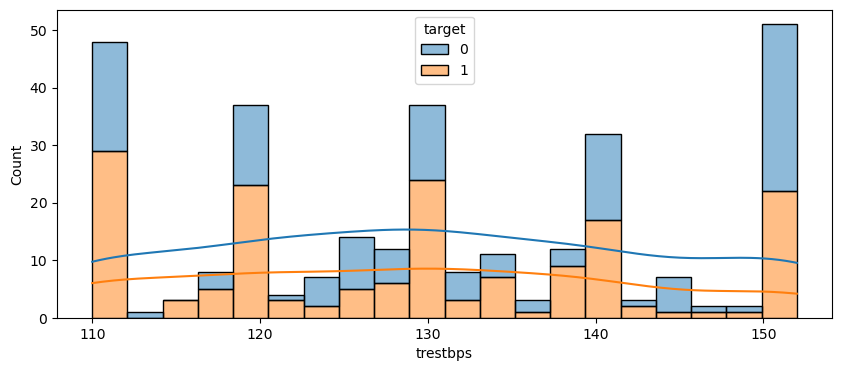

In [45]:
# Example: Histogram of trestbps, separated by CVD status
plt.figure(figsize=(10, 4))
sns.histplot(df, x='trestbps',hue='target', bins=20, kde=True, multiple='stack')
plt.show()

In [46]:
df_new_one = df[["chol","target"]].groupby(["chol","target"]).size().reset_index().rename(columns = {0:"number"})
df_new_one.head(10)

,chol,target,number
0,188.4,0,16
1,188.4,1,15
2,192.0,1,2
3,193.0,0,1
4,193.0,1,1
5,195.0,1,1
6,196.0,1,2
7,197.0,0,2
8,197.0,1,4
9,198.0,0,1


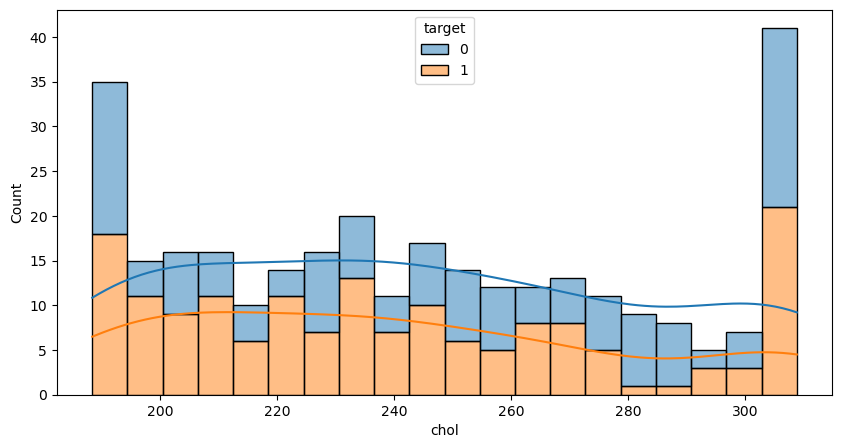

In [47]:
# Example: Histogram of chol, separated by CVD status
plt.figure(figsize=(10, 5))
sns.histplot(df, x='chol',hue='target', bins=20, kde=True, multiple='stack')
plt.show()

In [48]:
df_new_one = df[["slope","target"]].groupby(["slope","target"]).size().reset_index().rename(columns = {0:"number"})
df_new_one.head()

,slope,target,number
0,0,0,12
1,0,1,9
2,1,0,91
3,1,1,49
4,2,0,35


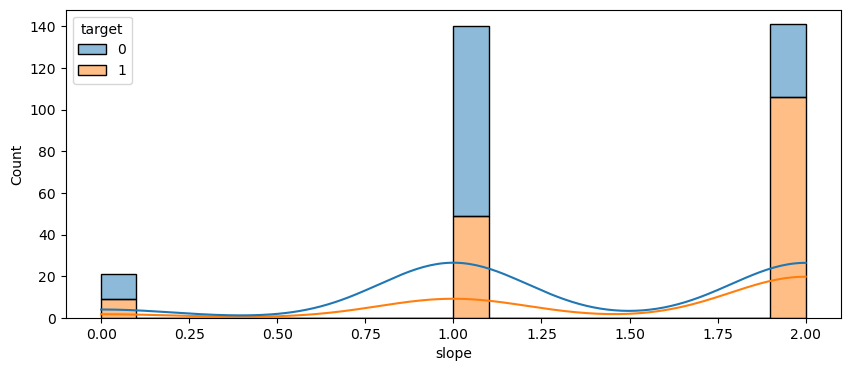

In [49]:
plt.figure(figsize=(10, 4))
sns.histplot(df, x='slope',hue='target', bins=20, kde=True, multiple='stack')
plt.show()

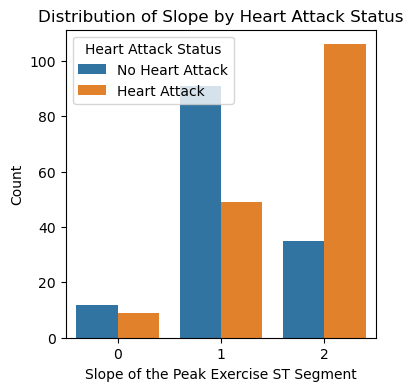

In [50]:
# Countplot of slope vs. Target (heart attack)
plt.figure(figsize=(4, 4))
sns.countplot(x='slope', hue='target', data=df)
plt.title('Distribution of Slope by Heart Attack Status')
plt.xlabel('Slope of the Peak Exercise ST Segment')
plt.ylabel('Count')
plt.legend(title='Heart Attack Status', labels=['No Heart Attack', 'Heart Attack'])
plt.show()

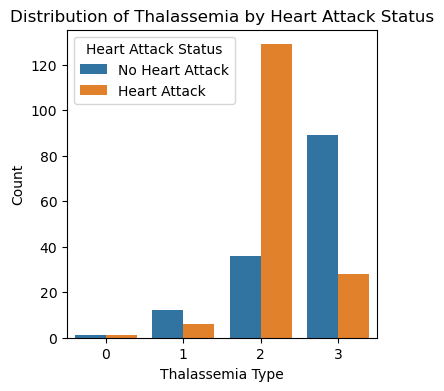

In [51]:
# Countplot of thal vs. Target (heart attack)
plt.figure(figsize=(4, 4))
sns.countplot(x='thal', hue='target', data=df)
plt.title('Distribution of Thalassemia by Heart Attack Status')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.legend(title='Heart Attack Status', labels=['No Heart Attack', 'Heart Attack'])
plt.show()

In [52]:
df_tt = df[["target","thal"]].groupby(["thal"]).value_counts().reset_index().rename(columns = {0:"number"})
df_tt

,thal,target,number
0,0,0,1
1,0,1,1
2,1,0,12
3,1,1,6
4,2,1,129
5,2,0,36
6,3,0,89
7,3,1,28


In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,176.8,0,2.8,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,176.8,0,0.8,2,0,2,1
4,57,0,0,120.0,308.9,0,1,163.0,1,0.6,2,0,2,1


In [54]:
## Other factors determining the occurance of heart attack

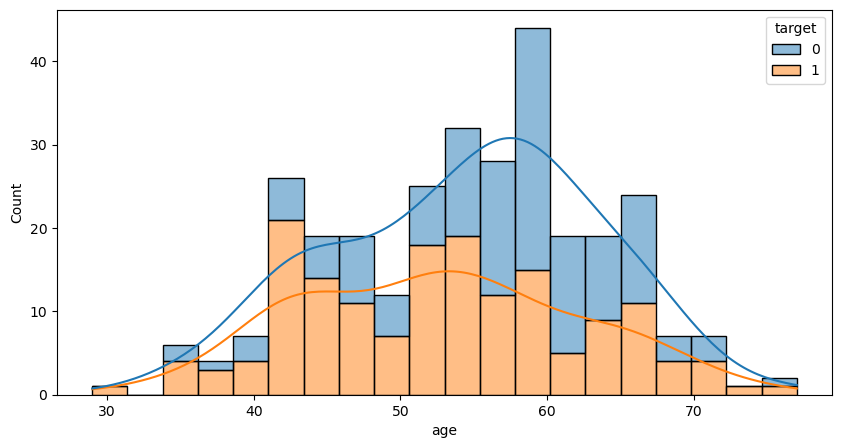

In [99]:
#for age
plt.figure(figsize=(10, 5))
sns.histplot(df, x='age',hue='target', bins=20, kde=True, multiple='stack')
plt.show()

<Axes: xlabel='age', ylabel='Density'>

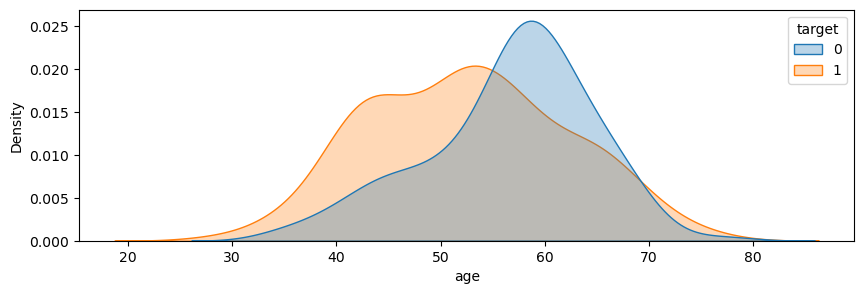

In [56]:
plt.figure(figsize=(10,3))
sns.kdeplot(x='age', data=df, color='red',hue = "target", fill=True, alpha=0.3)

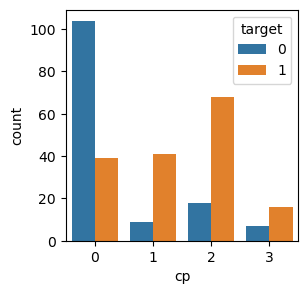

In [57]:
# for cp
plt.figure(figsize=(3,3))
sns.countplot(x = "cp",data = df,hue = "target")
plt.show()


<Axes: xlabel='cp', ylabel='Density'>

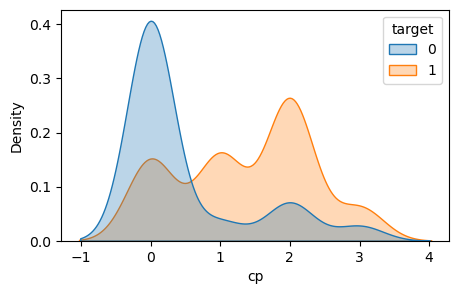

In [58]:
plt.figure(figsize=(5,3))
sns.kdeplot(x='cp', data=df, color='red',hue = "target", fill=True, alpha=0.3)

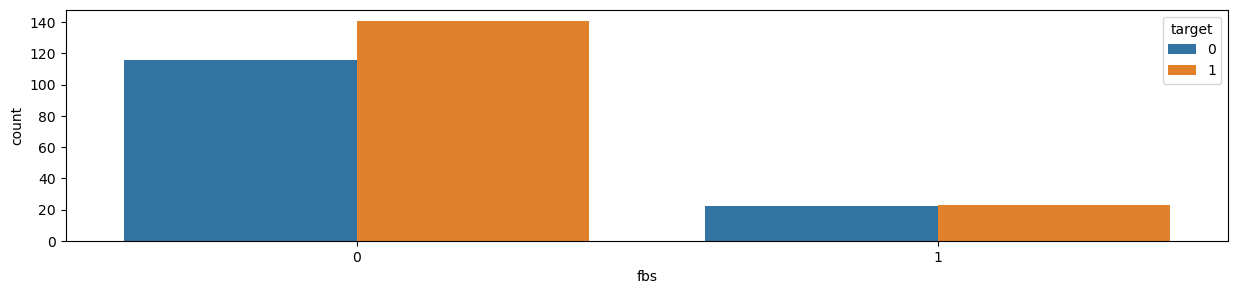

In [59]:
## for fbs
plt.figure(figsize=(15,3))
sns.countplot(x = "fbs",data = df,hue = "target")
plt.show()


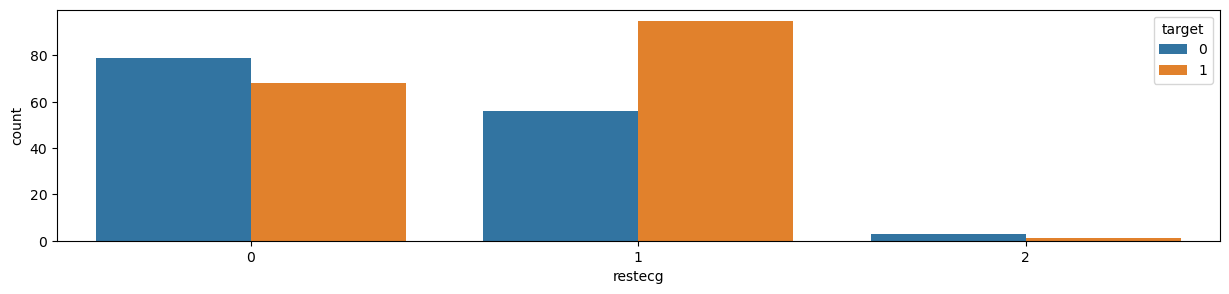

In [60]:
## for rest ecg

plt.figure(figsize=(15,3))
sns.countplot(x = "restecg",data = df,hue = "target")
plt.show()

<Axes: xlabel='restecg', ylabel='Density'>

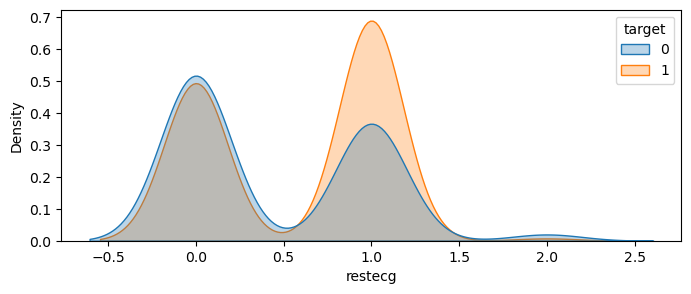

In [61]:
plt.figure(figsize=(8,3))
sns.kdeplot(x='restecg', data=df, color='red',hue = "target", fill=True, alpha=0.3)

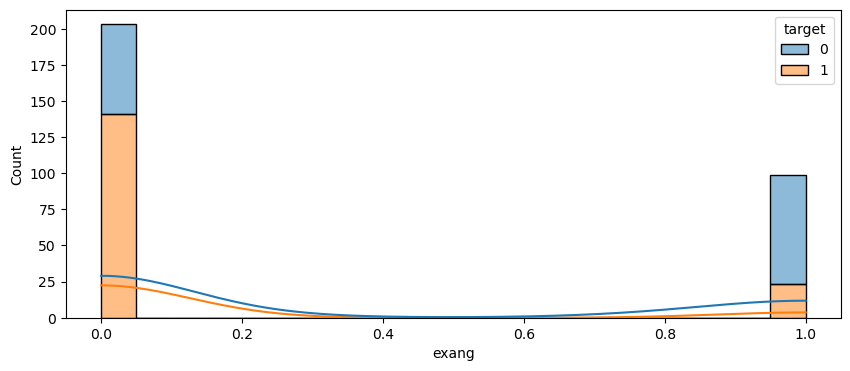

In [101]:
# for exang
plt.figure(figsize=(10, 4))
sns.histplot(df, x='exang',hue='target', bins=20, kde=True, multiple='stack')
plt.show()

<Axes: xlabel='exang', ylabel='Density'>

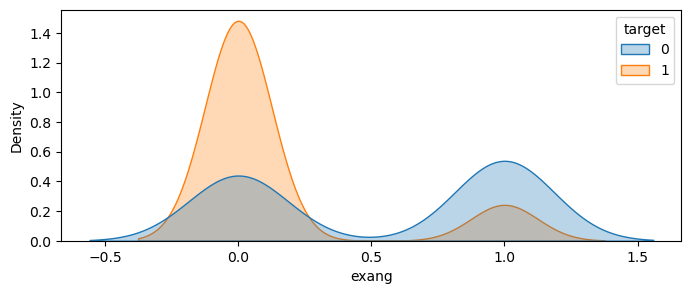

In [65]:
plt.figure(figsize=(8,3))
sns.kdeplot(x='exang', data=df, color='red',hue = "target", fill=True, alpha=0.3)

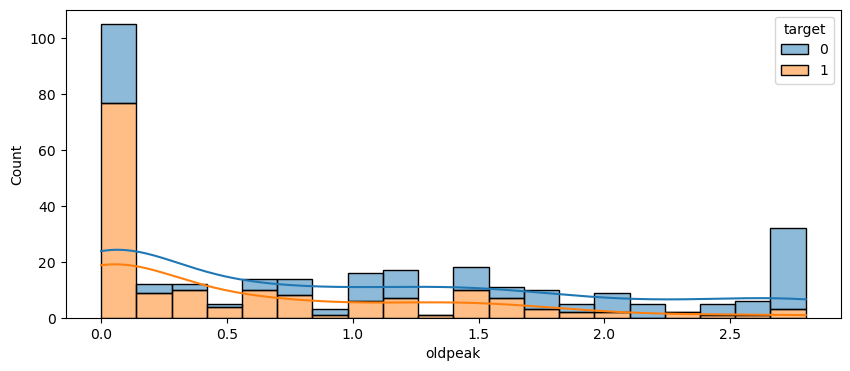

In [102]:
# for oldpeak

plt.figure(figsize=(10, 4))
sns.histplot(df, x='oldpeak',hue='target', bins=20, kde=True, multiple='stack')
plt.show()

<Axes: xlabel='oldpeak', ylabel='Density'>

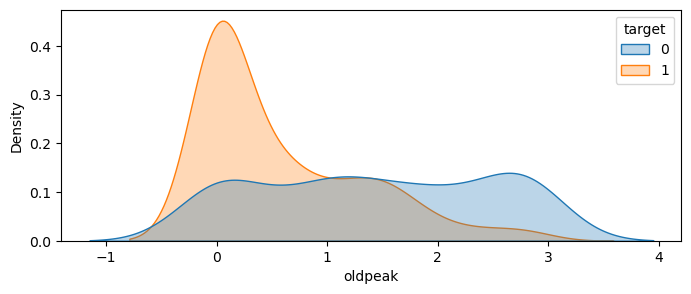

In [67]:
plt.figure(figsize=(8,3))
sns.kdeplot(x='oldpeak', data=df,hue = "target", fill=True, alpha=0.3)

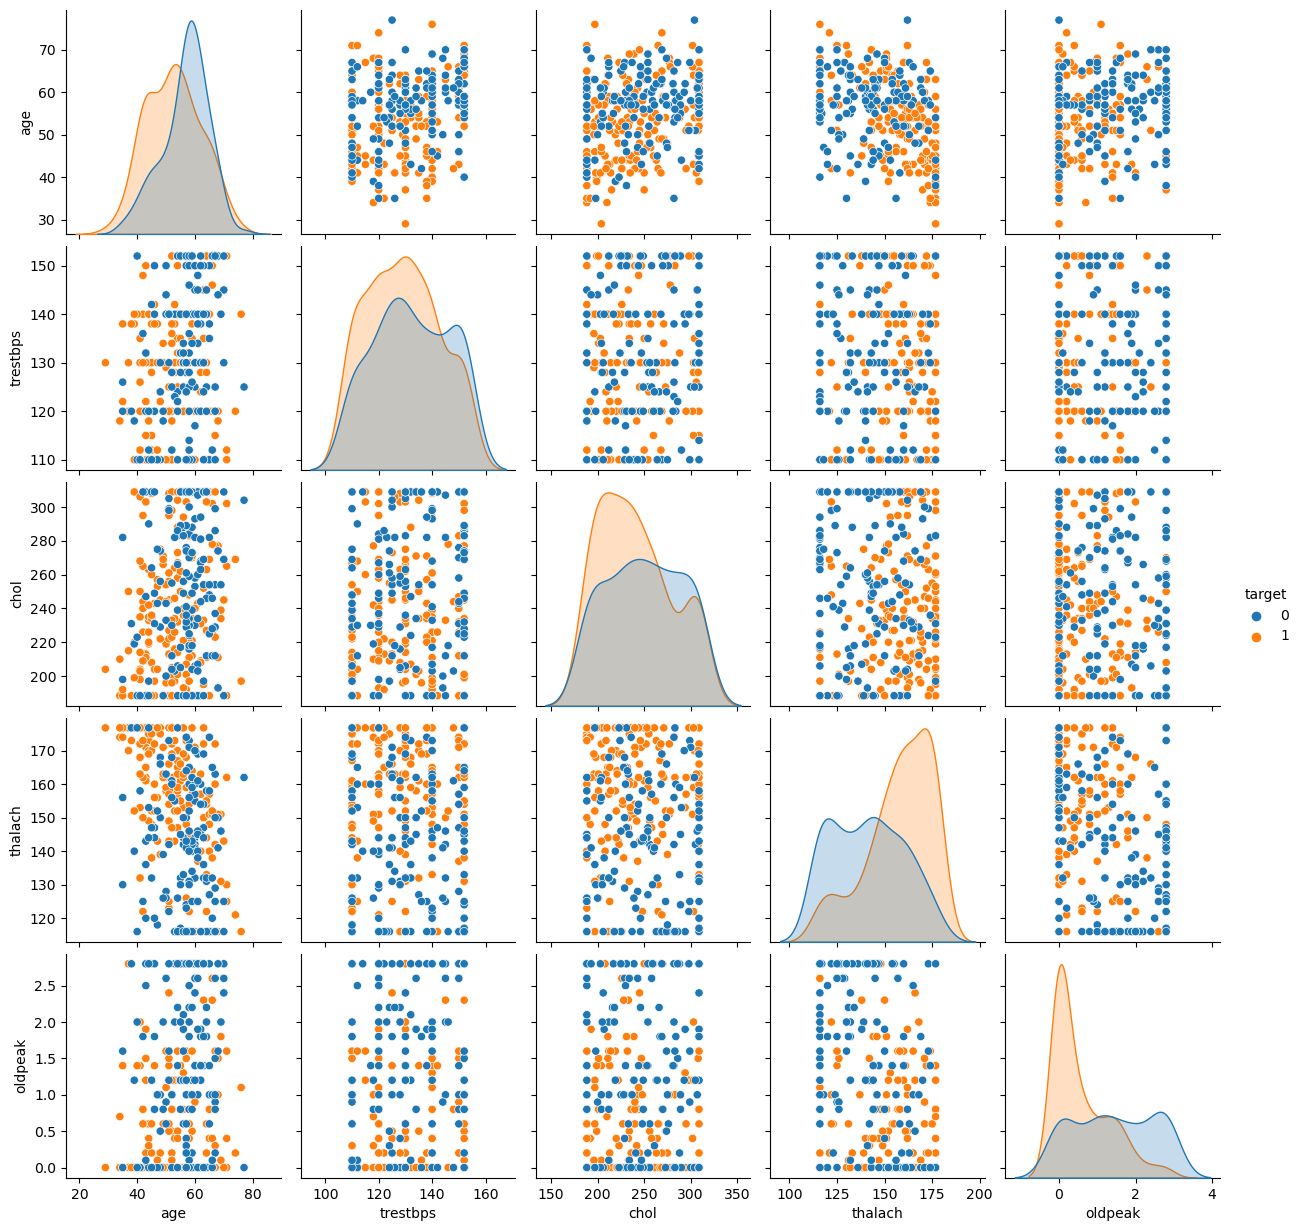

In [105]:
## pairplot
# pairplot for numeric columns
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']],hue='target')

## Correlation analysis

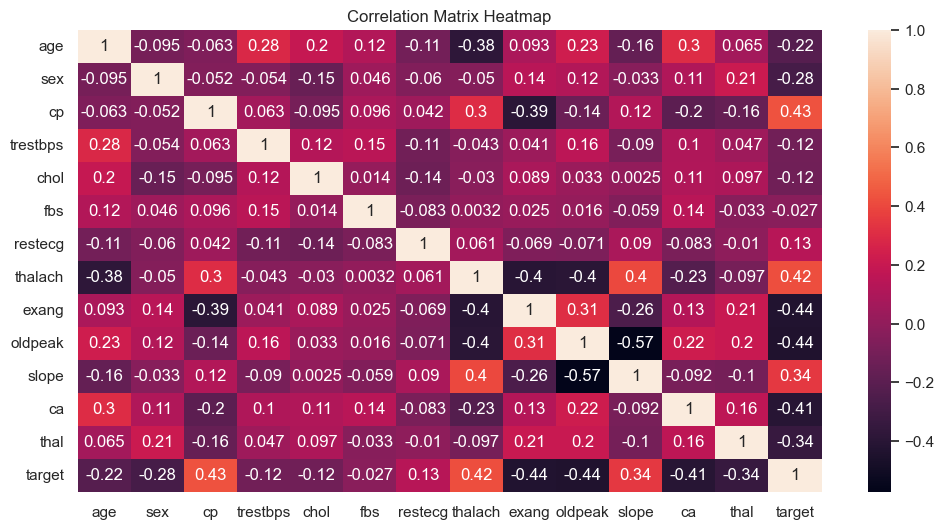

In [129]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))  # Set the figure size
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix,annot=True)

plt.title("Correlation Matrix Heatmap")
plt.show()

## Feature Scaling

In [71]:
## Feature Scaling

In [108]:
from sklearn.preprocessing import StandardScaler
# -infinity to infinity
# z = (X - mean)/std deviation

scale = StandardScaler()
df[['age','trestbps','chol','thalach']]=scale.fit_transform(df[['age','trestbps','chol','thalach']])

## Preaparing The data 

In [109]:
x = df.drop(["target"],axis = 1)
y_init = df["target"]

In [110]:
y = y_init.to_numpy()

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1) # 80 : 20

In [113]:
x_train.shape

(241, 13)

In [114]:
y_train.shape

(241,)

# 2. Model building


## Apply logistic regression and evaluting performance

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
LR_model = LogisticRegression()

In [117]:
LR_model.fit(x_train,y_train)

LogisticRegression()

In [118]:
y_pred = LR_model.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
accuracy_logreg = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy of Logistic Regression: {accuracy_logreg:.4f}')

print("\n")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression: 80.3279


              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



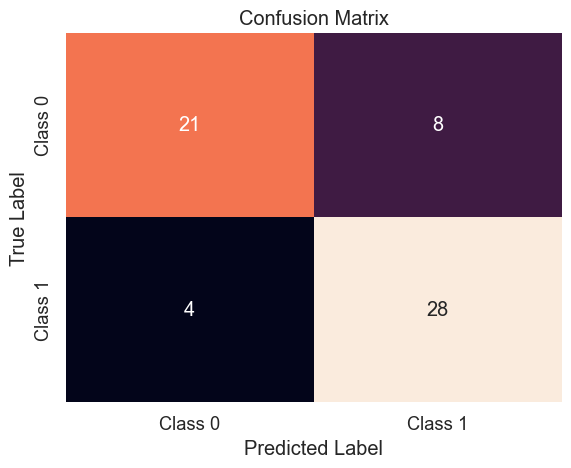

In [121]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix using Seaborn
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cbar=False,
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [122]:
import statsmodels.api as sm

# Add a constant term to the features matrix
X_train_with_const = sm.add_constant(x_train)

# Fit logistic regression using statsmodels
logit_model = sm.Logit(y_train, X_train_with_const)
result = logit_model.fit()

# Display summary including coefficients and p-values
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.337416
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  241
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                           13
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.5100
Time:                        11:49:51   Log-Likelihood:                -81.317
converged:                       True   LL-Null:                       -165.95
Covariance Type:            nonrobust   LLR p-value:                 2.605e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3485      1.111      3.013      0.003       1.170       5.526
age            0.0351      0.

## Applying Random Forest and evaluting performance

In [130]:
from sklearn.ensemble import RandomForestClassifier
my_rf_classifier = RandomForestClassifier()

In [131]:
my_rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [132]:
my_predictions = my_rf_classifier.predict(x_test)

In [135]:
print(accuracy_score(y_test, my_predictions)*100)

80.32786885245902


In [136]:
print(classification_report(y_test, my_predictions))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



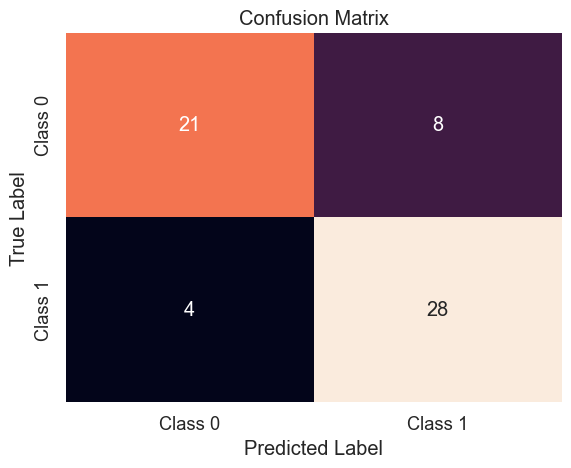

In [137]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, my_predictions)
# Visualize the confusion matrix using Seaborn
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt="d", cbar=False,
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Hyperparameter tunning:


In [175]:
my_rf_classifier1 = RandomForestClassifier(n_estimators=50,criterion='entropy')
my_rf_classifier1.fit(x_train, y_train)
my_predictions1 = my_rf_classifier1.predict(x_test)
print(accuracy_score(y_test, my_predictions1))

0.819672131147541


In [176]:
print(classification_report(y_test, my_predictions1))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

